# Ejercicio 4.2

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import fftpack

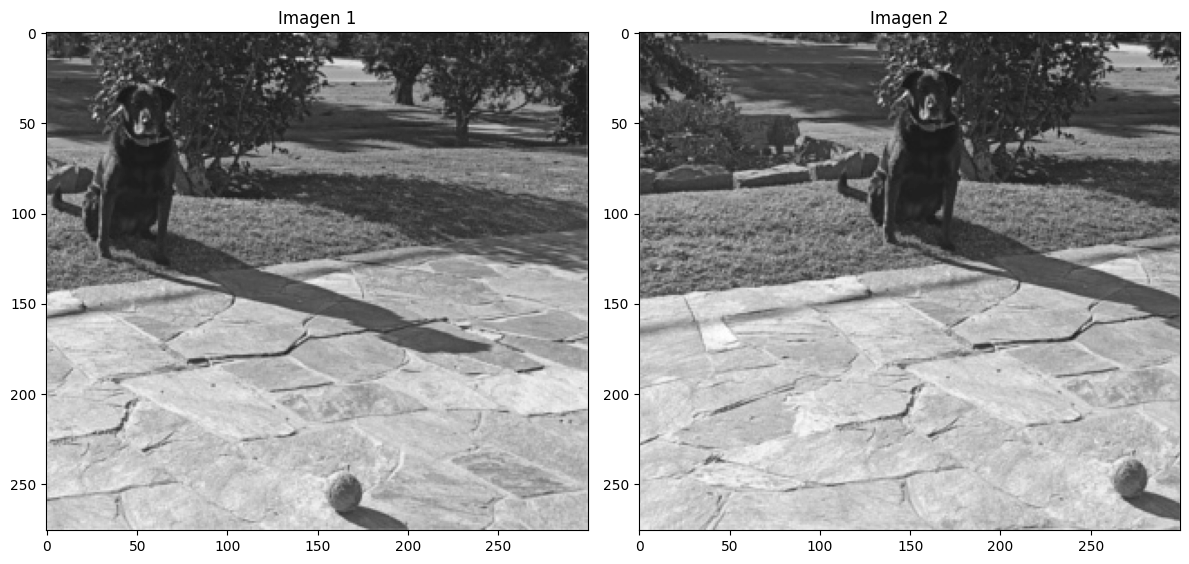

In [62]:

imga = np.array(Image.open('../assets/dog1ss.jpg').convert("L"))
imgb = np.array(Image.open('../assets/dog2ss.jpg').convert('L'))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imga, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 1")

plt.subplot(1, 2, 2)
plt.imshow(imgb, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 2")

plt.tight_layout()
plt.show()

In [58]:
# 2D-DFT
fft_a = fftpack.fft2(imga)
fft_b = fftpack.fft2(imgb)
# Conjugate
fft_b_c = np.conj(fft_b)
# Hadamart Product
result = np.multiply(fft_a, fft_b_c)
# Normalize
result_normalized = (result - result.min()) / (result.max() - result.min()) * 255
# R(u,v)
epsilon = 1e-10
R_u_v = np.divide(result, result_normalized + epsilon)
# DFT^-1
dft_inverse = fftpack.ifft(R_u_v)
# El DFT-1 me muestra el desplazamiento de cada pixel

(276, 300)


In [55]:

# Tomar la magnitud
dft_magnitude = np.abs(dft_inverse)

# Encontrar el índice del valor máximo
max_idx = np.unravel_index(np.argmax(dft_magnitude), dft_magnitude.shape)

# Desplazamiento en x y y
deltay, deltax = max_idx

print(f"Desplazamiento en x: {deltax}")
print(f"Desplazamiento en y: {deltay}")

Desplazamiento en x: 193
Desplazamiento en y: 3
